In [934]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [935]:
def find_contours(dimensions, img) :


    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    

    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:20]

    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        #detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        #checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            #extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) #List that stores the character's binary image (unsorted)

    #Return characters on ascending order with respect to the x-coordinate (most-left character first)
    
    #arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

In [936]:
def segment_characters(image) :

    #Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    plt.imshow(img_lp)
    plt.show()
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    plt.imshow(img_gray_lp)
    plt.show()
    _, img_binary_lp = cv2.threshold(img_gray_lp, 255, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    plt.imshow(img_binary_lp)
    plt.show()
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    plt.imshow(img_binary_lp)
    plt.show()
    img_binary_lp1 = cv2.dilate(img_binary_lp,(3,3))
    #plt.show(img_binary_lp1)
    #plt.show()
    #plt.imshow(img_binary_lp)
    #img_binary_lp = cv2.resize(image, (333, 75))

    LP_WIDTH = img_binary_lp1.shape[0]
    LP_HEIGHT = img_binary_lp1.shape[1]

    # Make borders white
    img_binary_lp1[0:3,:] = 0
    img_binary_lp1[:,0:3] = 0
    img_binary_lp1[72:75,:] = 0
    img_binary_lp1[:,330:333] = 0

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/9,
                       LP_WIDTH/1,
                       LP_HEIGHT/9,
                       LP_HEIGHT/1]
    plt.imshow(img_binary_lp1, cmap='gray')
    plt.show()
    #cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp1)

    return char_list

   #def bwareaopen(image, areaPixels):
        #image = img_binary_lp1.copy()
        
        #for idx in np.arange(len(contours)):
            #area = cv2.contourArea(contour[idx])
            #if (area >= 0 and area <= areaPixels):
                #cv2.drawContour(image, contour, idx, (0,0,0), -1)
        #return img_binary_lp1

In [928]:
def imclearborder(imgBW, radius):

    # Given a black and white image, first find all of its contours
    imgBWcopy = imgBW.copy()
    contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, 
        cv2.CHAIN_APPROX_SIMPLE)

    # Get dimensions of image
    imgRows = imgBW.shape[0]
    imgCols = imgBW.shape[1]    

    contourList = [] # ID list of contours that touch the border

    # For each contour...
    for idx in np.arange(len(contours)):
        # Get the i'th contour
        cnt = contours[idx]

        # Look at each point in the contour
        for pt in cnt:
            rowCnt = pt[0][1]
            colCnt = pt[0][0]

            # If this is within the radius of the border
            # this contour goes bye bye!
            check1 = (rowCnt >= 0 and rowCnt < radius) or (rowCnt >= imgRows-1-radius and rowCnt < imgRows)
            check2 = (colCnt >= 0 and colCnt < radius) or (colCnt >= imgCols-1-radius and colCnt < imgCols)

            if check1 or check2:
                contourList.append(idx)
                break

    for idx in contourList:
        cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy


In [57]:
cv_img = []
for img in glob.glob("D:/Bui Tuan/License Plate Recognition (NDBSX)/plate_car/plate_car/*.jpg"):
    name_img=img.split("/")[-1]
    n= cv2.imread(img)
    cv_img.append(n)

In [58]:
image = cv_img[233].copy()

In [717]:
image = cv2.imread("D:/Bui Tuan/License Plate Recognition (NDBSX)/data/Anh xu ly/92C02103.jpg")

In [996]:
cv_img1 = []
for img1 in glob.glob("D:/Bui Tuan/License Plate Recognition (NDBSX)/plate_car/process image/process image/*.jpg"):
    name_img=img1.split("/")[-1]
    n= cv2.imread(img1)
    cv_img1.append(n)

In [1973]:
image = cv_img1[262].copy()

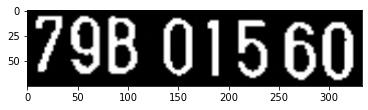

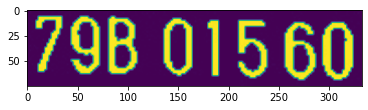

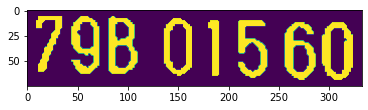

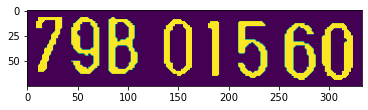

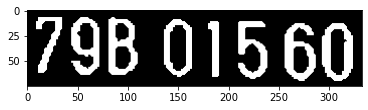

In [1976]:
char = segment_characters(image)

9


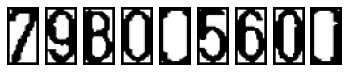

In [1977]:
for i in range(len(char)):
    plt.subplot(1, len(char), i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')
print(len(char))

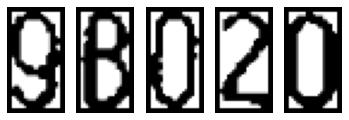

In [1971]:
listchar = []
for i in range(len(char)):
    if np.sum(char[i] == 0) > np.sum(char[i] == 255):
        listchar.append(char[i])
for i in range(len(listchar)):
    plt.subplot(1, len(listchar), i+1)
    plt.imshow(listchar[i], cmap='gray')
    plt.axis('off')

In [1972]:

listfinal = []
if len(char) == 8:
    listfinal = char.copy()
    for i in range(len(listfinal)):
        plt.subplot(1, len(listfinal), i+1)
        plt.imshow(listfinal[i], cmap='gray')
        plt.axis('off')
if len(char) != 8 and len(listchar) == 8:
    listfinal = listchar.copy()
for i in range(len(listfinal)):
    plt.subplot(1, len(listfinal), i+1)
    plt.imshow(listfinal[i], cmap='gray')
    plt.axis('off')

In [1962]:
 cv2.imwrite("D:/Bui Tuan/License Plate Recognition (NDBSX)/data\character/image265_7.jpg", listfinal[7])

True